In [9]:
%cd

/Users/khoavan


In [10]:
%ls

Desktop/                     configure.ac
Documents/                   data/
Downloads/                   downloaded_videos/
LLFF/                        guessing_game/
LLLF_loading.ipynb           metrax/
Library/                     minimal-trainer-zoo/
Makefile.pre.in              mongodb-macos-aarch64-7.0.8/
Movies/                      nltk_data/
Music/                       project_test.ipynb
Pictures/                    research-rag-llm/
Public/                      scikit_learn_data/
YouTubeAdData/               test.py
anaconda3/                   tmp_trainer/
colmap/


In [11]:
%cd research-rag-llm

/Users/khoavan/research-rag-llm


In [12]:
import pandas as pd
df = pd.read_json('data/extracted_text.jsonl', lines=True)
df.head(5)

,arxiv_id,text,title,topic,abstract,authors
0,2503.21330v1,Large Language Models for Traffic and Transpor...,Large Language Models for Traffic and Transpor...,social sciences,The rapid rise of Large Language Models (LLMs)...,"[Yimo Yan, Yejia Liao, Guanhao Xu, Ruili Yao, ..."
1,2503.21644v1,Four-twist effects on excitations\nin symmetri...,Four-twist effects on excitations in symmetric...,physics,Symmetric orbifold CFTs contain twist operator...,"[Bin Guo, Shaun D. Hampton]"
2,2503.21295v1,R-PRM: Reasoning-Driven Process Reward Modelin...,R-PRM: Reasoning-Driven Process Reward Modeling,mathematics,Large language models (LLMs) inevitably make m...,"[Shuaijie She, Junxiao Liu, Yifeng Liu, Jiajun..."
3,2503.20295v1,arXiv:2503.20295v1 [hep-th] 26 Mar 2025\nPac...,Packaged Quantum States and Symmetry: A Group-...,mathematics,We present a group-theoretic framework showing...,[Rongchao Ma]
4,2503.16807v1,Submitted to the Annals of Applied Statistics\...,Multi-View Orthogonal Projection Regression wi...,biology,Multi-omics integration offers novel insights ...,"[Zongrui Dai, Yvonne J. Huang, Gen Li]"


In [13]:
df['length'] = df['text'].apply(lambda x: len(x))
df.head(5)

,arxiv_id,text,title,topic,abstract,authors,length
0,2503.21330v1,Large Language Models for Traffic and Transpor...,Large Language Models for Traffic and Transpor...,social sciences,The rapid rise of Large Language Models (LLMs)...,"[Yimo Yan, Yejia Liao, Guanhao Xu, Ruili Yao, ...",284520
1,2503.21644v1,Four-twist effects on excitations\nin symmetri...,Four-twist effects on excitations in symmetric...,physics,Symmetric orbifold CFTs contain twist operator...,"[Bin Guo, Shaun D. Hampton]",81247
2,2503.21295v1,R-PRM: Reasoning-Driven Process Reward Modelin...,R-PRM: Reasoning-Driven Process Reward Modeling,mathematics,Large language models (LLMs) inevitably make m...,"[Shuaijie She, Junxiao Liu, Yifeng Liu, Jiajun...",46553
3,2503.20295v1,arXiv:2503.20295v1 [hep-th] 26 Mar 2025\nPac...,Packaged Quantum States and Symmetry: A Group-...,mathematics,We present a group-theoretic framework showing...,[Rongchao Ma],155629
4,2503.16807v1,Submitted to the Annals of Applied Statistics\...,Multi-View Orthogonal Projection Regression wi...,biology,Multi-omics integration offers novel insights ...,"[Zongrui Dai, Yvonne J. Huang, Gen Li]",61631


In [14]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   arxiv_id  403 non-null    object
 1   text      403 non-null    object
 2   title     403 non-null    object
 3   topic     403 non-null    object
 4   abstract  403 non-null    object
 5   authors   403 non-null    object
 6   length    403 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 22.2+ KB


arxiv_id    0
text        0
title       0
topic       0
abstract    0
authors     0
length      0
dtype: int64

First, we survey the distribution of lengths (in characters) of our research paper dataset.

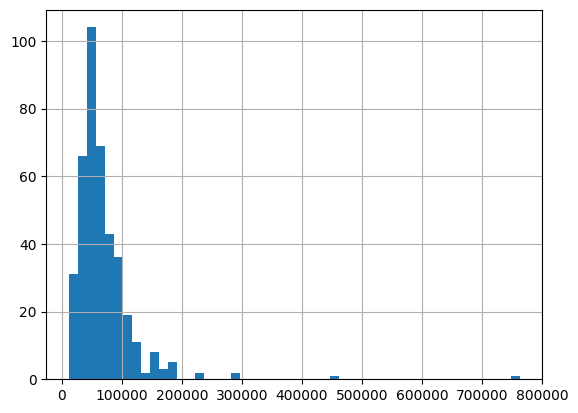

In [15]:
import matplotlib.pyplot as plt
df['length'].describe()
df['length'].hist(bins=50)
plt.show()

Use boxplot to compare the distributions of lengths by topics.

Text(0.5, 1.0, 'Paper Length by Topic')

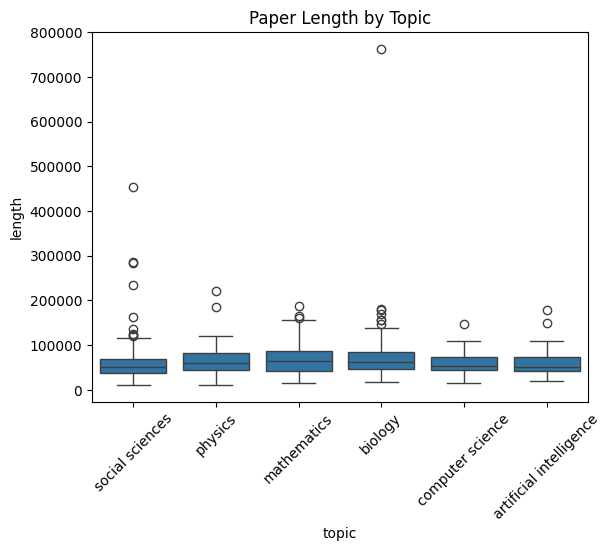

In [16]:
import seaborn as sns

sns.boxplot(data=df, x="topic", y="length")
plt.xticks(rotation=45)
plt.title("Paper Length by Topic")


In [17]:
cleaned_df = pd.read_json('data/processed/cleaned.jsonl', lines=True)
cleaned_df['length'] = cleaned_df['cleaned text'].apply(lambda x: len(x))
cleaned_df['number of chunks'] = cleaned_df['chunks'].apply(lambda x: len(x))
cleaned_df.head(5)

,arxiv_id,text,title,topic,abstract,authors,cleaned text,chunks,length,number of chunks
0,2503.21330v1,Large Language Models for Traffic and Transpor...,Large Language Models for Traffic and Transpor...,social sciences,The rapid rise of Large Language Models (LLMs)...,"[Yimo Yan, Yejia Liao, Guanhao Xu, Ruili Yao, ...",Large Language Models for Traffic and Transpor...,[Large Language Models for Traffic and Transpo...,216871,255
1,2503.21644v1,Four-twist effects on excitations\nin symmetri...,Four-twist effects on excitations in symmetric...,physics,Symmetric orbifold CFTs contain twist operator...,"[Bin Guo, Shaun D. Hampton]",Four-twist effects on excitations in symmetric...,[Four-twist effects on excitations in symmetri...,67618,143
2,2503.21295v1,R-PRM: Reasoning-Driven Process Reward Modelin...,R-PRM: Reasoning-Driven Process Reward Modeling,mathematics,Large language models (LLMs) inevitably make m...,"[Shuaijie She, Junxiao Liu, Yifeng Liu, Jiajun...",R-PRM: Reasoning-Driven Process Reward Modelin...,[R-PRM: Reasoning-Driven Process Reward Modeli...,33233,46
3,2503.20295v1,arXiv:2503.20295v1 [hep-th] 26 Mar 2025\nPac...,Packaged Quantum States and Symmetry: A Group-...,mathematics,We present a group-theoretic framework showing...,[Rongchao Ma],arXiv:2503.20295v1 [hep-th] 26 Mar 2025 Packag...,[arXiv:2503.20295v1 [hep-th] 26 Mar 2025 Packa...,136644,325
4,2503.16807v1,Submitted to the Annals of Applied Statistics\...,Multi-View Orthogonal Projection Regression wi...,biology,Multi-omics integration offers novel insights ...,"[Zongrui Dai, Yvonne J. Huang, Gen Li]",Submitted to the Annals of Applied Statistics ...,[Submitted to the Annals of Applied Statistics...,47065,76


Let's see how the distribution of lengths (in characters) changed after our data was cleaned and chunked.

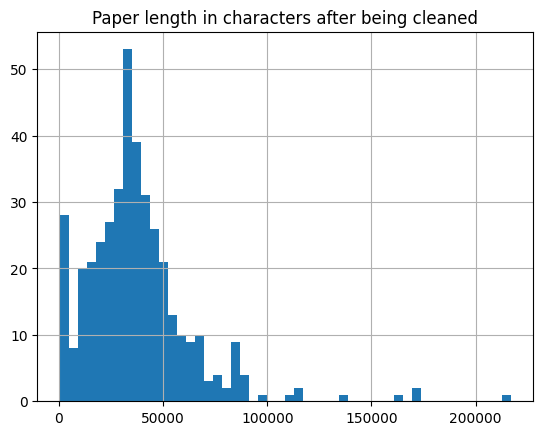

In [18]:
cleaned_df['length'].describe()
cleaned_df['length'].hist(bins=50)
plt.title('Paper length in characters after being cleaned')
plt.show()

And the distribution of the numbers of 5-chunks.

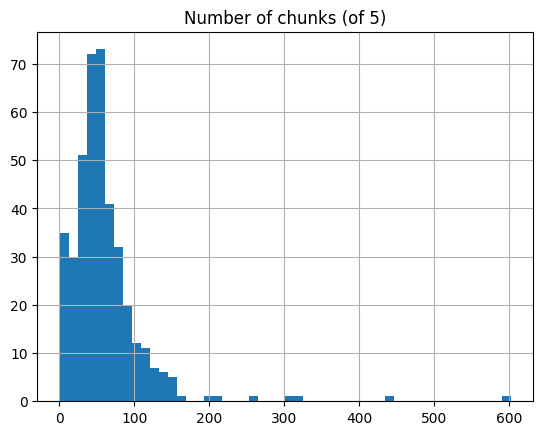

In [19]:
cleaned_df['number of chunks'].describe()
cleaned_df['number of chunks'].hist(bins=50)
plt.title('Number of chunks (of 5)')
plt.show()

Now compare by topics.

Text(0.5, 1.0, 'Cleaned Paper Length by Topic')

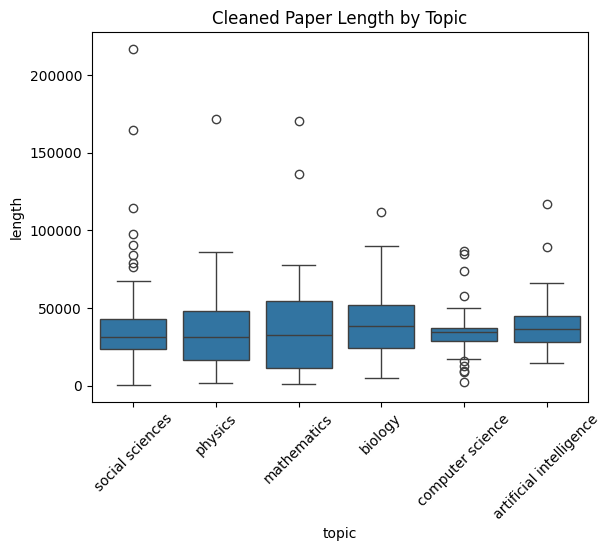

In [20]:
sns.boxplot(data=cleaned_df, x="topic", y="length")
plt.xticks(rotation=45)
plt.title("Cleaned Paper Length by Topic")


Text(0.5, 1.0, 'Number of 5-chunks by Topic')

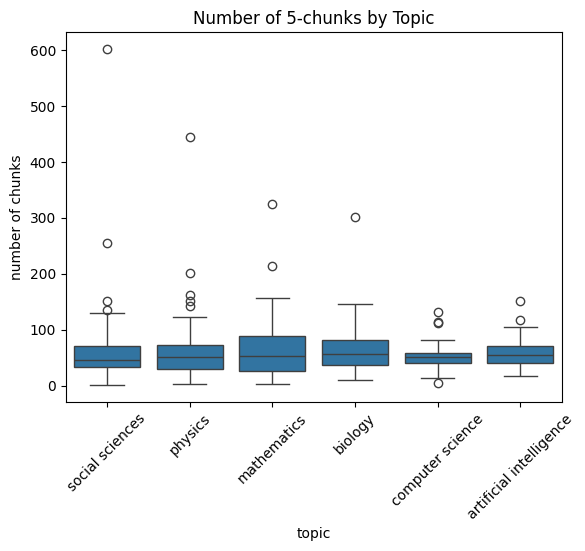

In [21]:
sns.boxplot(data=cleaned_df, x="topic", y="number of chunks")
plt.xticks(rotation=45)
plt.title("Number of 5-chunks by Topic")


After splitting our preprocessed data into train-validation-test, we need to make sure the distribution of topics in each set is representative, meaning each set shouldn't have too high a proportion of any single topic compared to that of the rest.

In [22]:
train_df = pd.read_json("data/train.jsonl", lines=True)
val_df = pd.read_json("data/validation.jsonl", lines=True)
test_df = pd.read_json("data/test.jsonl", lines=True)

print("Train topics:")
print(train_df['topic'].value_counts(normalize=True).round(3))

print("\nValidation topics:")
print(val_df['topic'].value_counts(normalize=True).round(3))

print("\nTest topics:")
print(test_df['topic'].value_counts(normalize=True).round(3))

Train topics:
topic
social sciences            0.199
biology                    0.191
physics                    0.177
mathematics                0.170
computer science           0.135
artificial intelligence    0.128
Name: proportion, dtype: float64

Validation topics:
topic
social sciences            0.200
biology                    0.183
physics                    0.183
mathematics                0.167
computer science           0.133
artificial intelligence    0.133
Name: proportion, dtype: float64

Test topics:
topic
biology                    0.197
social sciences            0.197
physics                    0.180
mathematics                0.164
computer science           0.148
artificial intelligence    0.115
Name: proportion, dtype: float64


In [23]:
topic_dist = pd.DataFrame({
    "Train": train_df['topic'].value_counts(normalize=True),
    "Validation": val_df['topic'].value_counts(normalize=True),
    "Test": test_df['topic'].value_counts(normalize=True),
}).fillna(0).round(3)

topic_dist

,Train,Validation,Test
topic,,,
artificial intelligence,0.128,0.133,0.115
biology,0.191,0.183,0.197
computer science,0.135,0.133,0.148
mathematics,0.170,0.167,0.164
physics,0.177,0.183,0.180
social sciences,0.199,0.200,0.197


Visualize with grouped bar charts.

<Axes: title={'center': 'Topic Distribution in Train/Val/Test'}, xlabel='topic'>

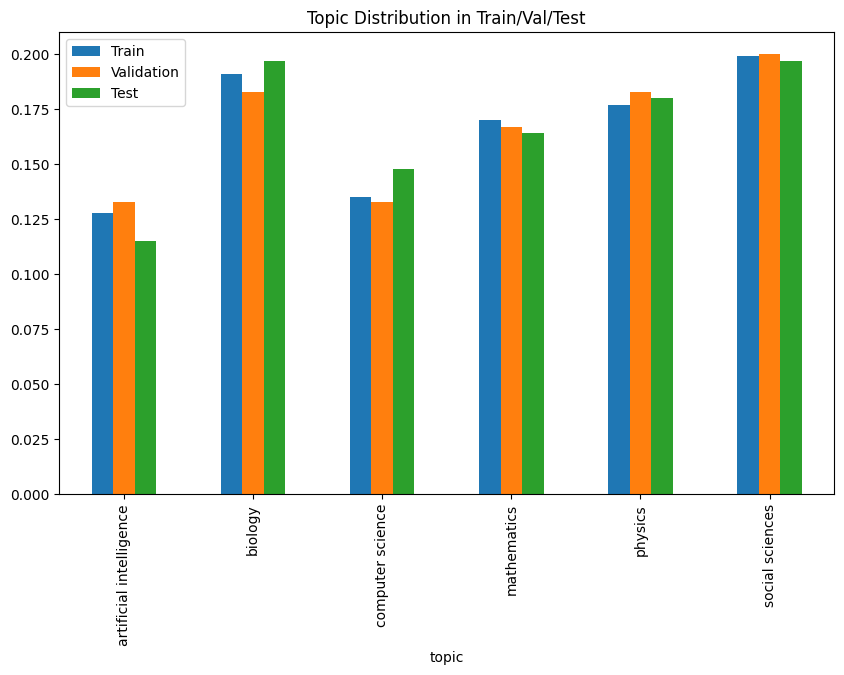

In [24]:
topic_dist.plot.bar(figsize=(10, 6), title="Topic Distribution in Train/Val/Test")
